# **Instrusion Detection System - KDD 1999 Dataset**

*Dataset: *
* [Link Zip File](https://drive.google.com/file/d/139yY6kCEWGUAY0m009slW7DS4Fdx36iT/view?usp=sharing)
* [Data Description](http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html)

*Reference:*
*  https://www.kaggle.com/code/abhaymudgal/intrusion-detection-system [1]
*   
*



## Settings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DATA_FOLDER = r'/content/drive/MyDrive/AppliedStatistics-DANDL-20212/data'
ZIP_FILE_PATH = DATA_FOLDER + r'/kdd-cup-1999.zip'
OUTPUT_UPZIP_FILE = DATA_FOLDER + r'/kdd-cup-1999/'

### Sanity Check

In [ ]:
import os
os.listdir(DATA_FOLDER)

['kdd-cup-1999.zip', 'description.url', 'kdd-cup-1999']

### Unzip Data 

In [ ]:
## Unzip zip file, comment if you run a second time
if (not(os.path.exists(OUTPUT_UPZIP_FILE))):
  !unzip $ZIP_FILE_PATH -d  $OUTPUT_UPZIP_FILE

In [ ]:
os.listdir(OUTPUT_UPZIP_FILE)

['corrected.gz',
 'kddcup.data.corrected',
 'kddcup.data.gz',
 'kddcup.data_10_percent.gz',
 'kddcup.data_10_percent_corrected',
 'kddcup.names',
 'kddcup.newtestdata_10_percent_unlabeled.gz',
 'kddcup.testdata.unlabeled.gz',
 'kddcup.testdata.unlabeled_10_percent.gz',
 'typo-correction.txt',
 'training_attack_types',
 'corrected',
 'kddcup.data',
 'kddcup.data_10_percent',
 'kddcup.newtestdata_10_percent_unlabeled',
 'kddcup.testdata.unlabeled',
 'kddcup.testdata.unlabeled_10_percent']

### Magic Functions

In [ ]:
%matplotlib inline

## Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

## Data Preprocessing

### From Reference [1]

#### Data Cleaning

In [ ]:
with open(OUTPUT_UPZIP_FILE + 'kddcup.names', 'r') as f:
  print(f.read()) 

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [ ]:
## Get Columns Name

cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""


columns = []
for c in cols.split(','):
    if(c.strip()):
      columns.append(c.strip())
columns.append('target')
print(len(columns))

42


In [ ]:
## Double check
columns

In [ ]:
with open(OUTPUT_UPZIP_FILE + 'training_attack_types' , 'r') as f:
  print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [ ]:
## Mapping attacks label --> attack categories
attacks_types = {}
with open(OUTPUT_UPZIP_FILE + 'training_attack_types' , 'r') as f:
  for line in f.readlines():
    if(len(line.split(" ")) == 2):    
      key, value = line.split(" ")
      attacks_types[key.strip()] = value.strip()

In [ ]:
## Normal is also need to take consider
attacks_types['normal'] = 'normal'

In [ ]:
attacks_types, len(attacks_types)

({'back': 'dos',
  'buffer_overflow': 'u2r',
  'ftp_write': 'r2l',
  'guess_passwd': 'r2l',
  'imap': 'r2l',
  'ipsweep': 'probe',
  'land': 'dos',
  'loadmodule': 'u2r',
  'multihop': 'r2l',
  'neptune': 'dos',
  'nmap': 'probe',
  'normal': 'normal',
  'perl': 'u2r',
  'phf': 'r2l',
  'pod': 'dos',
  'portsweep': 'probe',
  'rootkit': 'u2r',
  'satan': 'probe',
  'smurf': 'dos',
  'spy': 'r2l',
  'teardrop': 'dos',
  'warezclient': 'r2l',
  'warezmaster': 'r2l'},
 23)

In [ ]:
## Let's start
TENPERCENT_PATH = OUTPUT_UPZIP_FILE + 'kddcup.data_10_percent/kddcup.data_10_percent'
df = pd.read_csv(TENPERCENT_PATH, names = columns)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [ ]:
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


#### Data Understanding (EDA)

In [ ]:
df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.00,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.,normal
5,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.,normal
6,0,tcp,http,SF,212,1940,0,0,0,0,...,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.0,normal.,normal
7,0,tcp,http,SF,159,4087,0,0,0,0,...,1.0,0.0,0.09,0.04,0.0,0.0,0.0,0.0,normal.,normal
8,0,tcp,http,SF,210,151,0,0,0,0,...,1.0,0.0,0.12,0.04,0.0,0.0,0.0,0.0,normal.,normal
9,0,tcp,http,SF,212,786,0,0,0,1,...,1.0,0.0,0.12,0.05,0.0,0.0,0.0,0.0,normal.,normal


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [ ]:
df.describe(include= 'all')

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
count,494021.000000,494021,494021,494021,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021,494021
unique,NaN,3,66,11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,5
top,NaN,icmp,ecr_i,SF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,smurf.,dos
freq,NaN,283602,281400,378440,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280790,391458
mean,47.979302,NaN,NaN,NaN,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,...,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412,NaN,NaN
std,707.746472,NaN,NaN,NaN,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,...,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140,NaN,NaN
min,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.000000,NaN,NaN,NaN,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.000000,NaN,NaN,NaN,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.000000,NaN,NaN,NaN,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN


In [ ]:
df.shape

(494021, 43)

In [ ]:
## Example for one instance
df.loc[493801]

duration                             0
protocol_type                      tcp
service                           http
flag                                SF
src_bytes                          218
dst_bytes                          535
land                                 0
wrong_fragment                       0
urgent                               0
hot                                  0
num_failed_logins                    0
logged_in                            1
num_compromised                      0
root_shell                           0
su_attempted                         0
num_root                             0
num_file_creations                   0
num_shells                           0
num_access_files                     0
num_outbound_cmds                    0
is_host_login                        0
is_guest_login                       0
count                               23
srv_count                           23
serror_rate                        0.0
srv_serror_rate          

In [ ]:
df['duration'].describe()

count    494021.000000
mean         47.979302
std         707.746472
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       58329.000000
Name: duration, dtype: float64

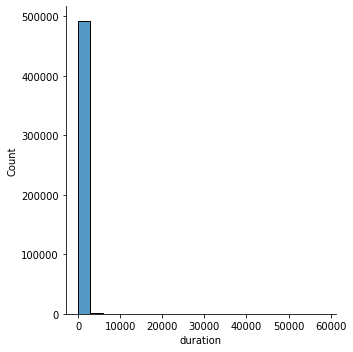

In [ ]:
sns.displot(df['duration'])

In [ ]:
df['protocol_type'].describe()

count     494021
unique         3
top         icmp
freq      283602
Name: protocol_type, dtype: object

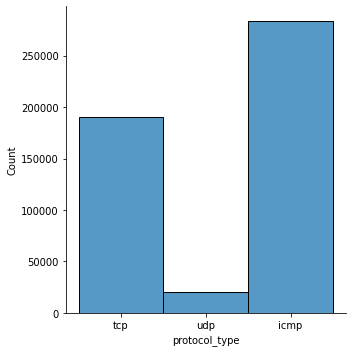

In [ ]:
sns.displot(df['protocol_type'])

In [ ]:
sum(df['protocol_type'] == 'udp')

20354

In [ ]:
df['service'].describe()

count     494021
unique        66
top        ecr_i
freq      281400
Name: service, dtype: object

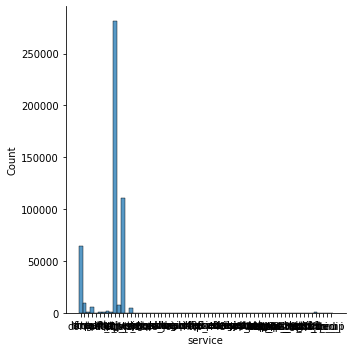

In [ ]:
sns.displot(df['service'])

In [ ]:
df['service'].value_counts()[:5]

ecr_i      281400
private    110893
http        64293
smtp         9723
other        7237
Name: service, dtype: int64

In [ ]:
df['service'].value_counts()[-5:]

X11        11
tim_i       7
pm_dump     1
tftp_u      1
red_i       1
Name: service, dtype: int64

In [ ]:
df['flag'].describe()

count     494021
unique        11
top           SF
freq      378440
Name: flag, dtype: object

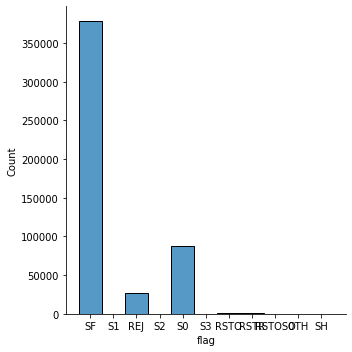

In [ ]:
sns.displot(df['flag'])

In [ ]:
df['count'].describe()

count    494021.000000
mean        332.285690
std         213.147412
min           0.000000
25%         117.000000
50%         510.000000
75%         511.000000
max         511.000000
Name: count, dtype: float64

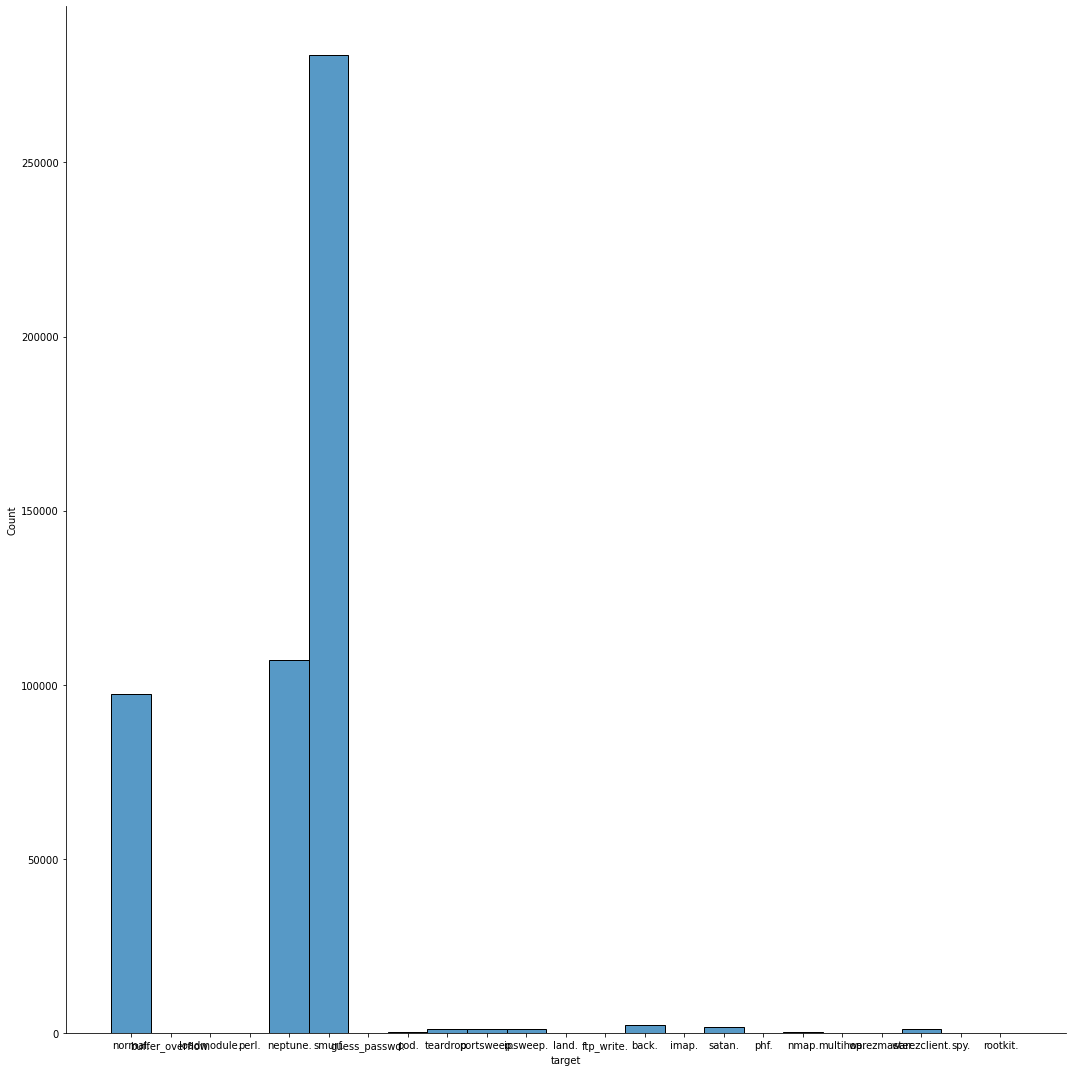

In [ ]:
sns.displot(df['target'], height=15)

In [ ]:
df['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

In [ ]:
df['Attack Type'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: Attack Type, dtype: int64

#### Feature Engineering

In [ ]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
#Finding categorical features except target variables
num_cols = df._get_numeric_data().columns
cate_cols = list(set(df.columns) - set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['protocol_type', 'flag', 'service']

In [ ]:
def bar_graph(feature):
  df[feature].value_counts().plot(kind= 'bar')

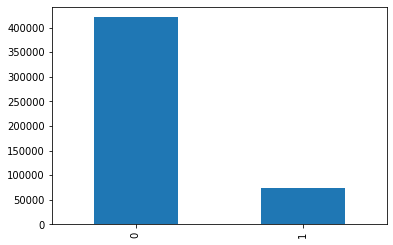

In [ ]:
bar_graph('logged_in')

In [ ]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """Entry point for launching an IPython kernel.


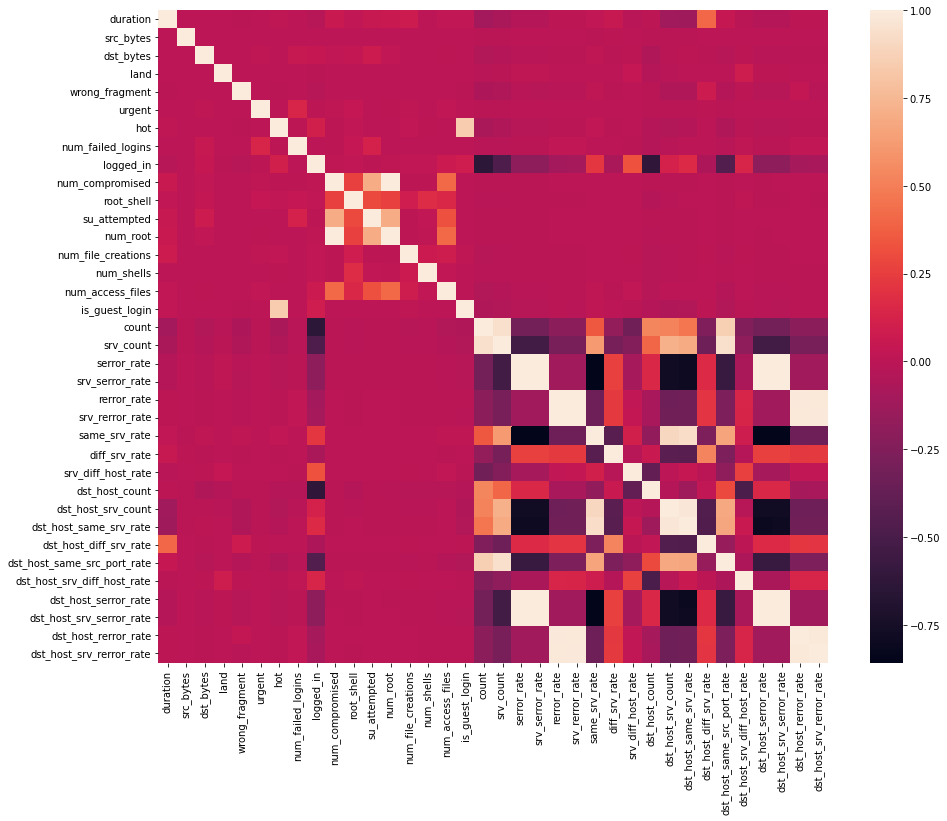

In [ ]:
df = df.dropna('columns')# drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = df.corr()

plt.figure(figsize = (15,12))

sns.heatmap(corr)

plt.show()

In [ ]:
## Check some pair of variables

In [ ]:
df['num_root'].corr(df['num_compromised'])

0.9938277978737916

In [ ]:
df['srv_serror_rate'].corr(df['serror_rate'])

0.998361507272553

In [ ]:
df['srv_count'].corr(df['count'])


0.9436670688882645

In [ ]:
df['srv_rerror_rate'].corr(df['rerror_rate'])


0.9947309539818242

In [ ]:
df['dst_host_same_srv_rate'].corr(df['dst_host_srv_count'])


0.9736854572953835

In [ ]:
df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate'])


0.9981559173373293

In [ ]:
df['dst_host_srv_rerror_rate'].corr(df['dst_host_rerror_rate'])


0.9848038371110285

In [ ]:
df['dst_host_same_srv_rate'].corr(df['same_srv_rate'])


0.9278080342690969

In [ ]:
df['dst_host_srv_count'].corr(df['same_srv_rate'])


0.8989546630323716

In [ ]:
df['dst_host_same_src_port_rate'].corr(df['srv_count'])


0.944926367678324

In [ ]:
df['dst_host_serror_rate'].corr(df['serror_rate'])


0.9986729680104371

In [ ]:
df['dst_host_srv_rerror_rate'].corr(df['srv_rerror_rate'])


0.9865705438845764

In [ ]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)
#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with dst_host_srv_count and should be ignored for analysis.
#(Correlation = 0.9736854572953938)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [ ]:
## Checking
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [ ]:
## standard variation
df_std = df.std()
df_std = df_std.sort_values(ascending = True)
df_std

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


urgent                              0.005510
land                                0.006673
su_attempted                        0.007793
root_shell                          0.010551
num_shells                          0.011020
num_failed_logins                   0.015520
num_access_files                    0.036482
is_guest_login                      0.037211
dst_host_srv_diff_host_rate         0.042133
diff_srv_rate                       0.082205
num_file_creations                  0.096416
dst_host_diff_srv_rate              0.109259
wrong_fragment                      0.134805
srv_diff_host_rate                  0.142397
rerror_rate                         0.231623
logged_in                           0.355345
serror_rate                         0.380717
same_srv_rate                       0.388189
dst_host_same_src_port_rate         0.481309
hot                                 0.782103
num_compromised                     1.798326
dst_host_count                     64.745380
dst_host_s

In [ ]:
df['protocol_type'].value_counts()


icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64

In [ ]:
df.drop('service',axis = 1,inplace= True) # Imbalanced feature maybe ?


In [ ]:
df.shape


(494021, 32)

In [ ]:
df.head()


,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,tcp,SF,181,5450,0,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,tcp,SF,239,486,0,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,tcp,SF,235,1337,0,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,tcp,SF,219,1337,0,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,tcp,SF,217,2032,0,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [ ]:
df.dtypes


duration                         int64
protocol_type                   object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count           

#### Labeling

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [ ]:
df['protocol_type'] = le.fit_transform(df['protocol_type'])

In [ ]:
df['flag'] = le.fit_transform(df['flag'])

#### Normalization

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = df.drop('target' , axis = 1)

In [ ]:
df.shape

(494021, 31)

In [ ]:
y = df['Attack Type']
X = df.drop(['Attack Type'], axis = 1)

In [ ]:
sc = MinMaxScaler()

In [ ]:
X = sc.fit_transform(X)
y = y.values


In [ ]:
X.shape, y.shape

((494021, 30), (494021,))

In [ ]:
## As we focus on the EDA so I will split the train and test right here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 7777)

## Modelling and Evaluation
 **Now we have:** \\
 `X` : Features of Training Data \\
 `y` : Target Variable of Training Data \\

### Evaluation Metrics
* First we use `accuracy` metric for the sake of simplicity


In [ ]:
from sklearn.metrics import accuracy_score

### Modelling

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lrModel = LogisticRegression()

In [ ]:
lrModel.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_train_pred = lrModel.predict(X_train)

In [ ]:
print("Accuracy on Training test: ", end="")
print(accuracy_score(y_train, y_train_pred))

Accuracy on Training test: 0.9935164987884977


In [ ]:
y_pred = lrModel.predict(X_test)

In [ ]:
print("Accuracy on Testing test: ", end="")
print(accuracy_score(y_test, y_pred))

Accuracy on Testing test: 0.9935716169714219


#### SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svcModel = SVC(gamma = 'scale')

In [ ]:
svcModel.fit(X_train, y_train)

SVC()

In [ ]:
y_train_pred = svcModel.predict(X_train)

In [ ]:
print("Accuracy on Training test: ", end="")
print(accuracy_score(y_train, y_train_pred))

Accuracy on Training test: 0.9985528438581969


In [ ]:
y_pred = svcModel.predict(X_test)

In [ ]:
print("Accuracy on Testing test: ", end="")
print(accuracy_score(y_test, y_pred))

Accuracy on Testing test: 0.9987057358597042


#### Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnbModel = GaussianNB()

In [ ]:
gnbModel.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_train_pred = gnbModel.predict(X_train)

In [ ]:
print("Accuracy on Training test: ", end="")
print(accuracy_score(y_train, y_train_pred))

Accuracy on Training test: 0.8902306386218481


In [ ]:
y_pred = gnbModel.predict(X_test)

In [ ]:
print("Accuracy on Testing test: ", end="")
print(accuracy_score(y_test, y_pred))

Accuracy on Testing test: 0.8897115201776393


#### Desicion Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtModel = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [ ]:
dtModel.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
y_train_pred = dtModel.predict(X_train)

In [ ]:
print("Accuracy on Training test: ", end="")
print(accuracy_score(y_train, y_train_pred))

Accuracy on Training test: 0.9905194656096485


In [ ]:
y_pred = dtModel.predict(X_test)

In [ ]:
print("Accuracy on Testing test: ", end="")
print(accuracy_score(y_test, y_pred))

Accuracy on Testing test: 0.9906641231207101


#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfModel = RandomForestClassifier()

In [ ]:
rfModel.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_train_pred = rfModel.predict(X_train)

In [ ]:
print("Accuracy on Training test: ", end="")
print(accuracy_score(y_train, y_train_pred))

Accuracy on Training test: 0.9999848939859937


In [ ]:
y_pred = rfModel.predict(X_test)

In [ ]:
print("Accuracy on Testing test: ", end="")
print(accuracy_score(y_test, y_pred))

Accuracy on Testing test: 0.9997117041962374


#### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbcModel = GradientBoostingClassifier()

In [ ]:
gbcModel.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
y_train_pred = gbcModel.predict(X_train)

In [ ]:
print("Accuracy on Training test: ", end="")
print(accuracy_score(y_train, y_train_pred))

Accuracy on Training test: 0.99918427524366


In [ ]:
y_pred = gbcModel.predict(X_test)

In [ ]:
print("Accuracy on Testing test: ", end="")
print(accuracy_score(y_test, y_pred))

Accuracy on Testing test: 0.9991228446821692
